In [5]:
# import numpy as np
# import cv2
# from matplotlib import pyplot as plt

# img = cv2.imread('X-Rays/image.png')
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# # noise removal
# kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# # sure background area
# sure_bg = cv2.dilate(opening,kernel,iterations=3)

# # Finding sure foreground area
# dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# # Finding unknown region
# sure_fg = np.uint8(sure_fg)
# unknown = cv2.subtract(sure_bg,sure_fg)

# # Marker labelling
# ret, markers = cv2.connectedComponents(sure_fg)

# # Add one to all labels so that sure background is not 0, but 1
# markers = markers+1

# # Now, mark the region of unknown with zero
# markers[unknown==255] = 0

# markers = cv2.watershed(img,markers)
# img[markers == -1] = [255,0,0]

# plt.imshow(img)

In [6]:
# import numpy as np
# import cv2
# from matplotlib import pyplot as plt

# img = cv2.imread('X-Rays/image.png')
# b,g,r = cv2.split(img)
# rgb_img = cv2.merge([r,g,b])

# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# # noise removal
# kernel = np.ones((2,2),np.uint8)
# #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# # sure background area
# sure_bg = cv2.dilate(closing,kernel,iterations=3)

# plt.subplot(221),plt.imshow(rgb_img)
# plt.title('Input Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(222),plt.imshow(thresh, 'gray')
# plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
# plt.subplot(223),plt.imshow(closing, 'gray')
# plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
# plt.subplot(224),plt.imshow(sure_bg, 'gray')
# plt.title("Dilation"), plt.xticks([]), plt.yticks([])
# plt.show()

In [7]:
# import numpy as np
# from Watershed import Watershed
# import PIL
# import matplotlib.pyplot as plt

# w = Watershed()
# image = np.array(Image.open('X-Rays/image.png'))
# labels = w.apply(image)
# plt.imshow(labels, cmap='Paired', interpolation='nearest')
# plt.show()

In [8]:
# from Watershed import *
# shed = Watershed(
#            data_image = "X-Rays/image.png",
#            binary_or_gray_or_color = "color",
#            size_for_calculations = 128,
#            sigma = 1,
#            gradient_threshold_as_fraction = 0.1,
#            level_decimation_factor = 16,
#            padding = 20,
#        )
# shed.extract_data_pixels()
# shed.display_data_image()
# shed.mark_image_regions_for_gradient_mods()                     #(A)
# shed.compute_gradient_image()
# shed.modify_gradients_with_marker_minima()                      #(B)
# shed.compute_Z_level_sets_for_gradient_image()
# shed.propagate_influence_zones_from_bottom_to_top_of_Z_levels()
# shed.display_watershed()
# shed.display_watershed_in_color()
# shed.extract_watershed_contours_seperated()
# shed.display_watershed_contours_in_color()

In [9]:
# import numpy as np 
# import cv2 
# from matplotlib import pyplot as plt 
  
# # Image operation using thresholding 
# img = cv2.imread('X-Rays/image.png') 
  
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# ret, thresh = cv2.threshold(gray, 0, 255, 
#                             cv2.THRESH_BINARY_INV +
#                             cv2.THRESH_OTSU) 
# cv2.imshow('image', thresh) 

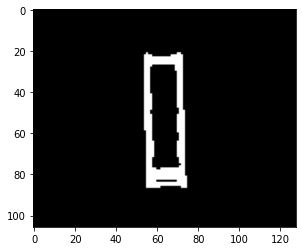

In [8]:
# Global Thresholding Method

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('X-Rays/U_2020_12_11_16_34_37.bmp',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
#     plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
#     plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
#     plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
#     plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.imshow(images[i*3+2],'gray')
#     plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
#     plt.savefig("Processed/thresh.png",bbox_inches='tight')
    cv2.imwrite("Processed/thresh.png", images[i*3+2])
    break
plt.show()